In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import polars as pl
import dask.array as da
from transformers import GPTNeoXForCausalLM, AutoTokenizer

from dask_jobqueue import SLURMCluster
from dask.distributed import Client
import numpy as np

# Process Duplicates

In [2]:
cluster = SLURMCluster(cores=8,
                    processes=4,
                    memory="32GB",
                    walltime="48:00:00",
                    # project="fiete",
                    queue="normal",
                    job_extra_directives=["--output=logs/%j.out", "--error=logs/%j.out"]
                    )
cluster.scale(jobs=32)
print("Dashboard: ", cluster.dashboard_link)

client = Client(cluster)
client

Dashboard:  http://172.16.20.135:8787/status


Connection method: Cluster object,Cluster type: dask_jobqueue.SLURMCluster
Dashboard: http://172.16.20.135:8787/status,
Dashboard: http://172.16.20.135:8787/status,Workers: 0
Total threads: 0,Total memory: 0 B
Comm: tcp://172.16.20.135:41683,Workers: 0
Dashboard: http://172.16.20.135:8787/status,Total threads: 0
Started: Just now,Total memory: 0 B


In [5]:
matches = []
for i in range(51):
    matches.append(da.from_npy_stack(f'/om/tmp/memorization/matches-count-a2a-opt-10k-01/{i}/'))
m = da.concatenate(matches, axis=1)


In [7]:
match_0 = m[1060 // 20, :].compute()


(array([[1.01967e+05, 3.20000e+01, 0.00000e+00, ..., 0.00000e+00,
         0.00000e+00, 1.00000e+00],
        [1.01970e+05, 3.00000e+01, 0.00000e+00, ..., 0.00000e+00,
         0.00000e+00, 0.00000e+00],
        [1.01980e+05, 2.00000e+01, 0.00000e+00, ..., 0.00000e+00,
         0.00000e+00, 0.00000e+00],
        ...,
        [1.01978e+05, 2.20000e+01, 0.00000e+00, ..., 0.00000e+00,
         0.00000e+00, 0.00000e+00],
        [1.01981e+05, 1.90000e+01, 0.00000e+00, ..., 0.00000e+00,
         0.00000e+00, 0.00000e+00],
        [1.01964e+05, 3.60000e+01, 0.00000e+00, ..., 0.00000e+00,
         0.00000e+00, 0.00000e+00]]),
 array([       0.  ,   101999.99,   203999.98,   305999.97,   407999.96,
          509999.95,   611999.94,   713999.93,   815999.92,   917999.91,
         1019999.9 ,  1121999.89,  1223999.88,  1325999.87,  1427999.86,
         1529999.85,  1631999.84,  1733999.83,  1835999.82,  1937999.81,
         2039999.8 ,  2141999.79,  2243999.78,  2345999.77,  2447999.76,
        

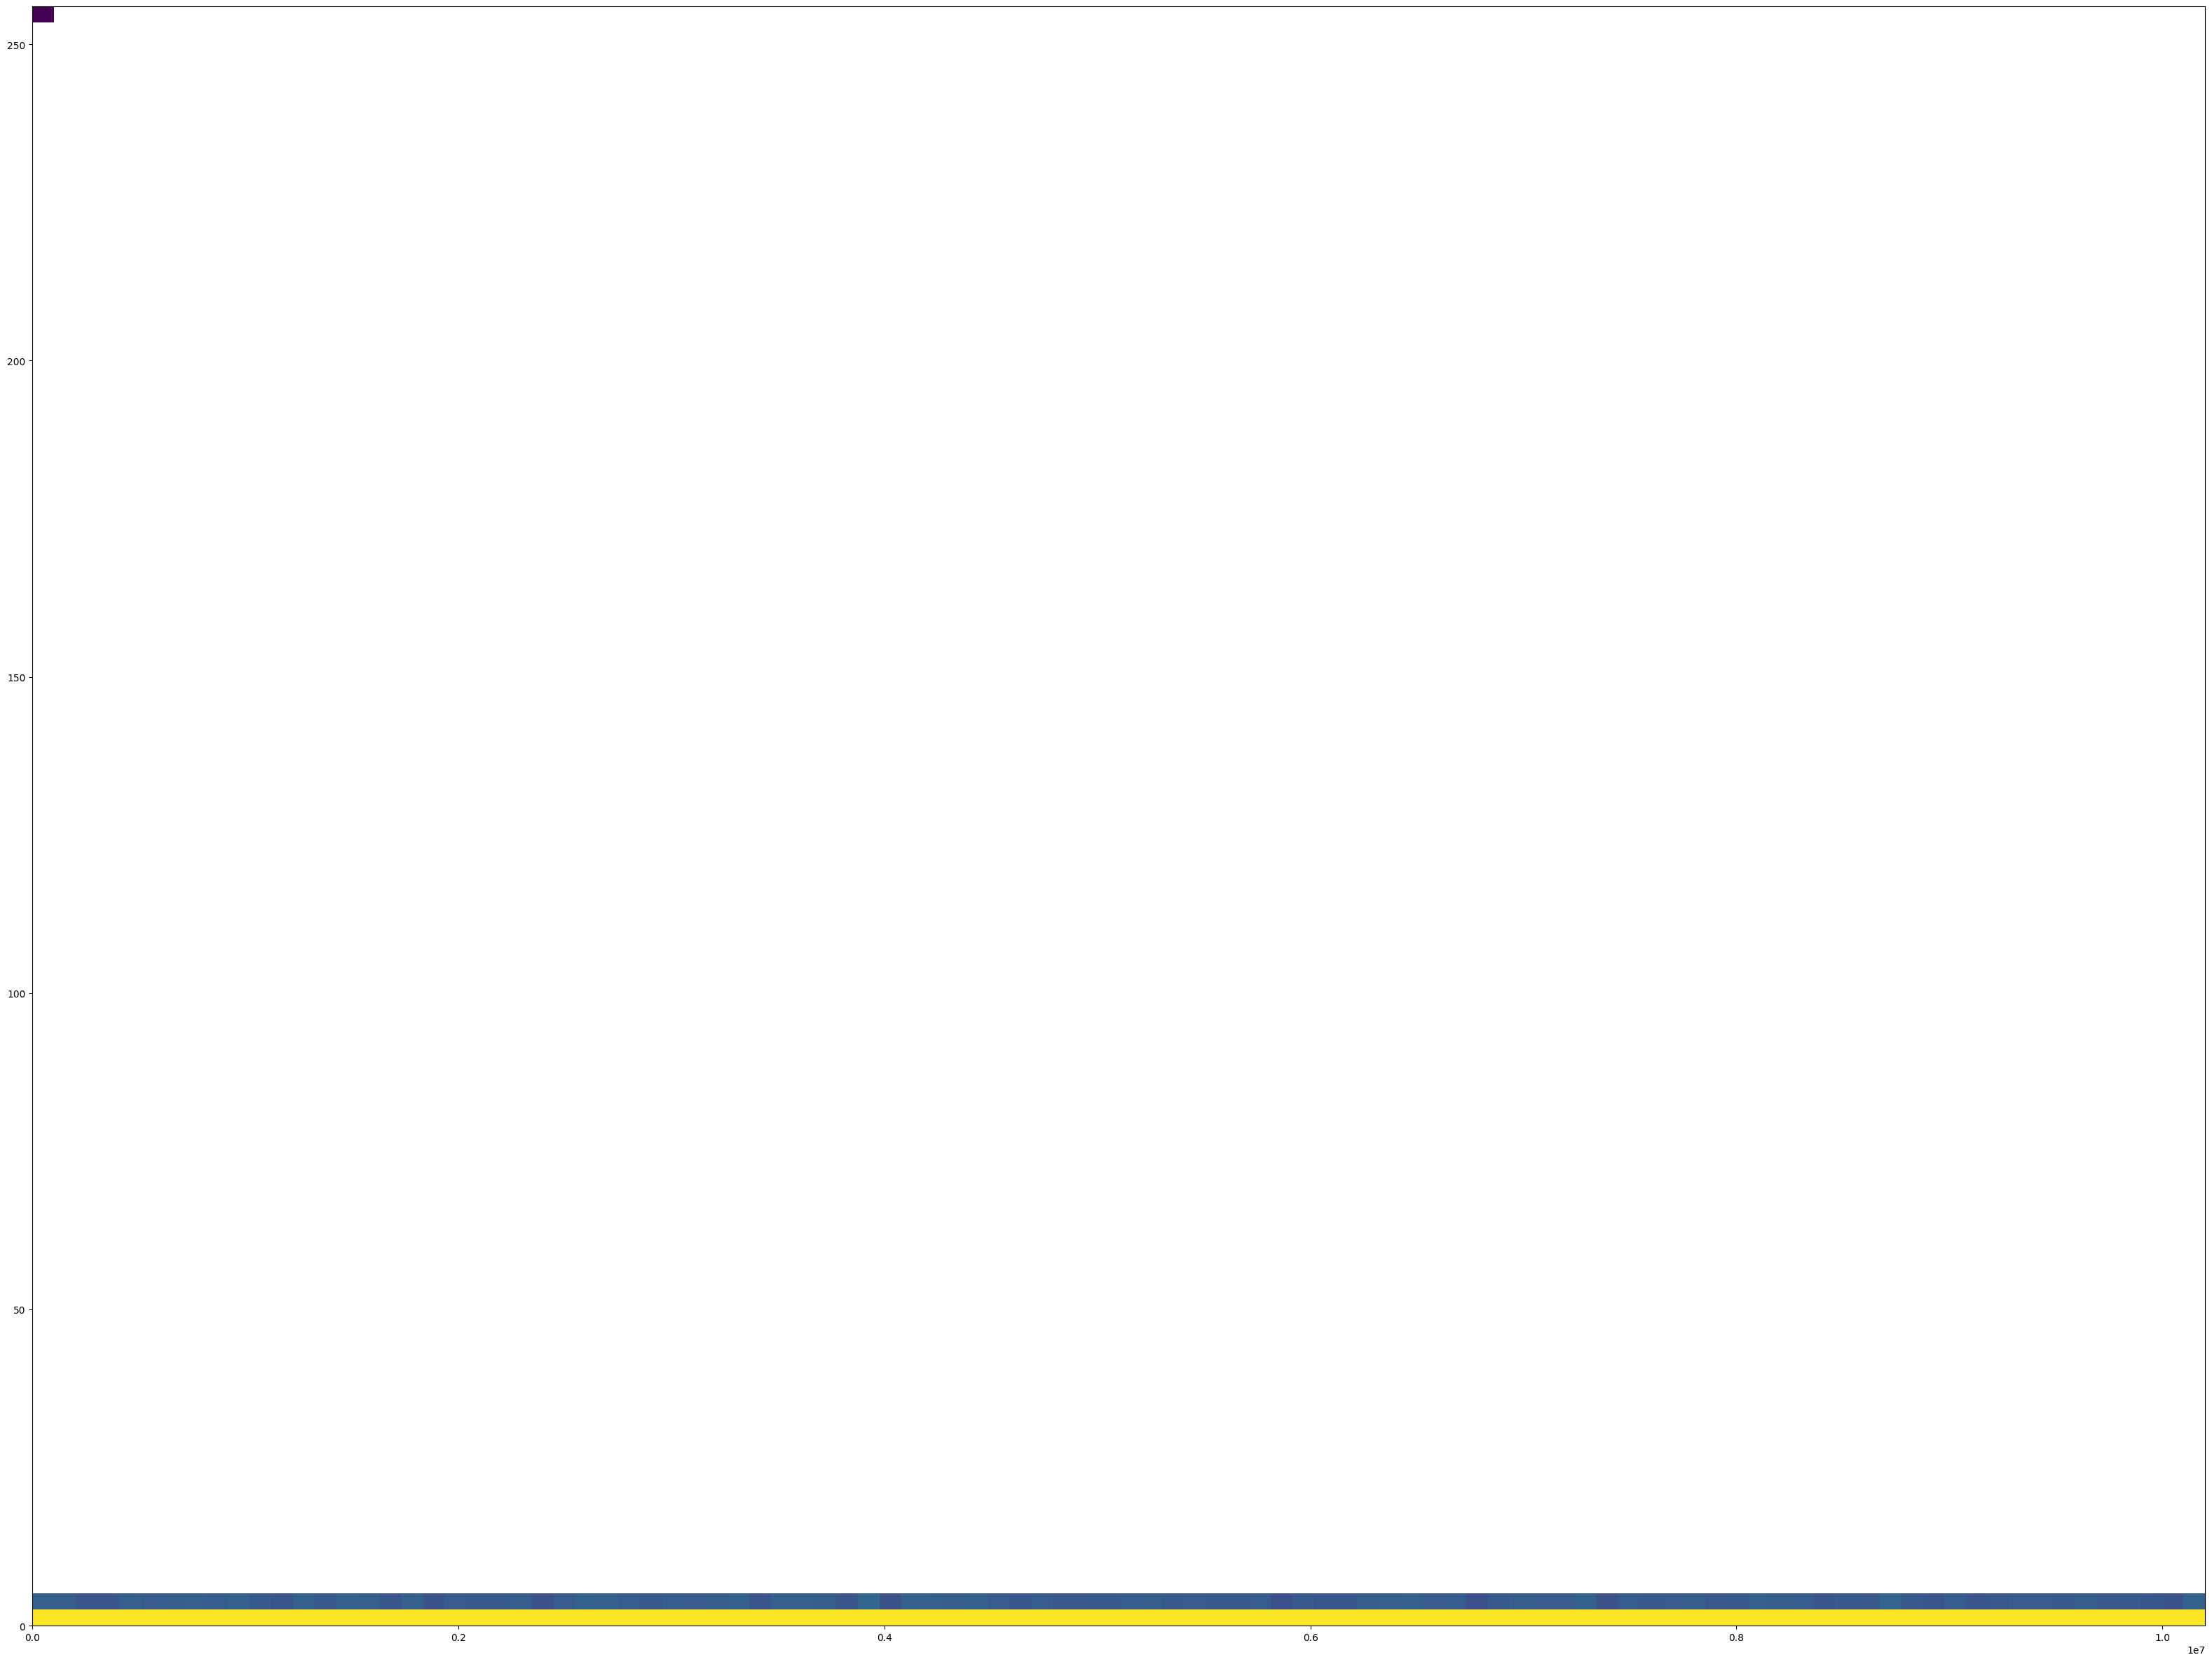

In [8]:
f, ax = plt.subplots(figsize=(40, 30))
ax.hist2d(np.arange(len(match_0)), match_0.T, norm='log', bins=100)


In [6]:
counts = []
bsize = 1000 * 1024
for k in range(0, 9):
    counts.append(da.topk(m[:, k*bsize:(k+1)*bsize], 10, axis=1))
m_topk = da.stack(counts).compute()
np.save("topk-01.npy", m_topk)

In [7]:
bsize = 1000 * 1024
for k in range(10):
    counts = []
    for i in range(1, 65, 4):
        counts.append(da.sum(m[:, k*bsize:(k+1)*bsize] >= i, axis=1))
    np.save(f"repeat_count_{k}-01.npy", da.stack(counts, axis=1).compute())
# repeat_count = da.stack(ocounts).compute()
